In [2]:
%matplotlib inline

In [3]:
import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map 
import tools                           # A few helpers to plot multiple images
from PIL import Image                  # For rescaling images
from ipywidgets import interact, fixed # Interact with images

In [12]:
img_link = 'images/Building.png'

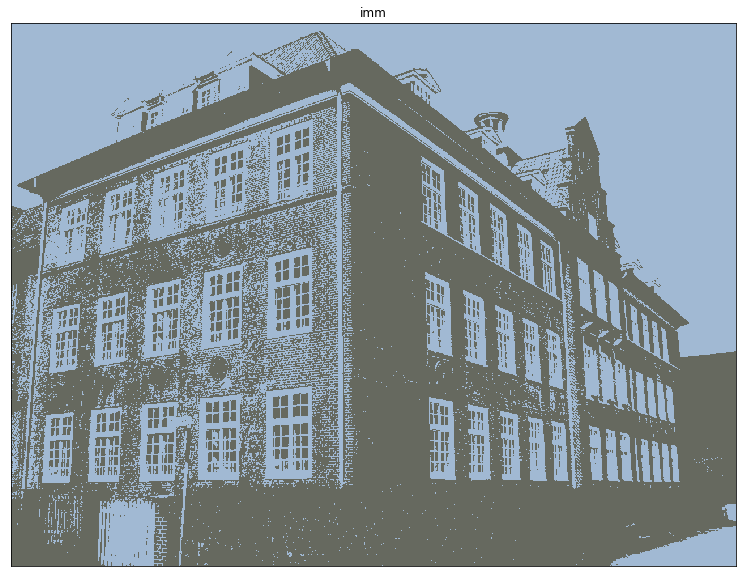

<class 'numpy.ndarray'>


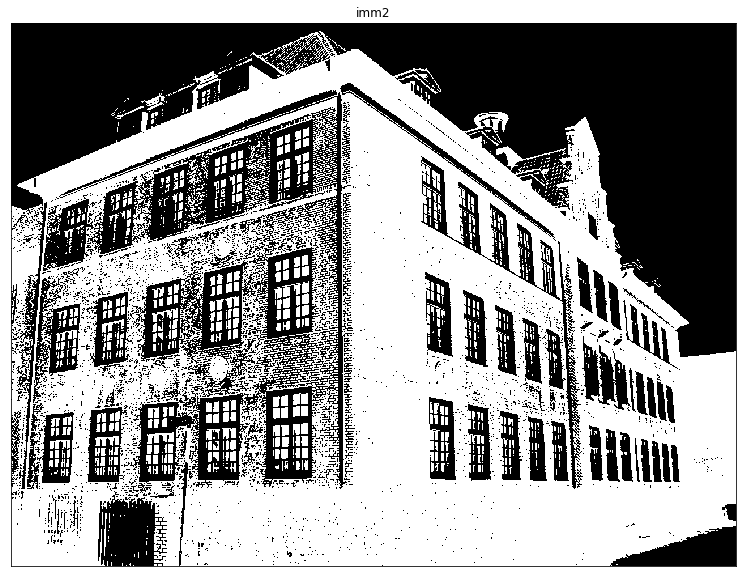

NameError: name 'rgb2gray' is not defined

In [109]:
imm = Image.open(img_link)
imm= imm.quantize(2)

tools.multiPlot(1, 1, (imm,), ('imm',), cmap_tuple=(cm.gray,))

imm2 = np.asarray(imm)
print(type(imm2))
tools.multiPlot(1, 1, (imm2,), ('imm2',), cmap_tuple=(cm.gray,))

imm3 = rgb2gray(imm2)
tools.multiPlot(1, 1, (imm3,), ('imm3',), cmap_tuple=(cm.gray,))
                               
                               

imm = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)
tools.multiPlot(1, 1, (imm,), ('imm',), cmap_tuple=(cm.gray,))
N = 64
imm  = imm/N
#imm  *= N
tools.multiPlot(1, 1, (imm,), ('imm',), cmap_tuple=(cm.gray,))


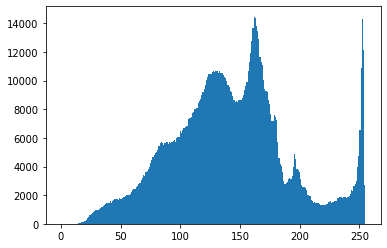

In [93]:
#histogram

import matplotlib.cm as cm

gray = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)

hist_np, bins = np.histogram( gray.ravel(),256,[0,256])

hist_cv = cv2.calcHist( [gray],[0],None,[256],[0,256])

# Plot an histogram with matplotlib
%matplotlib inline
plt.hist(gray.ravel(), bins=256, range=(0,255))
plt.show()

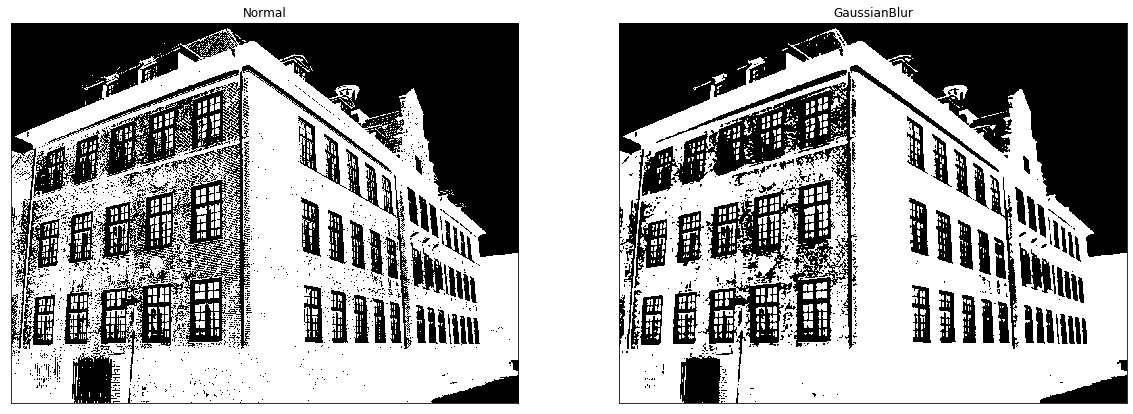

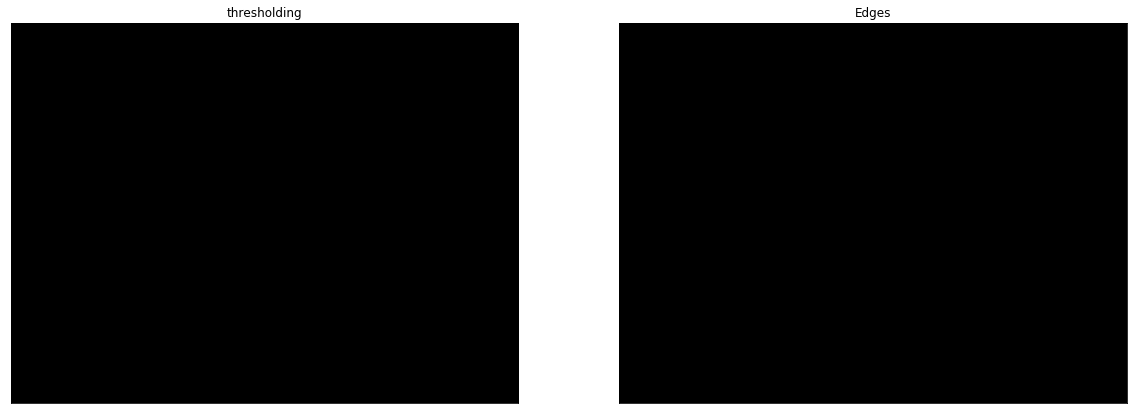

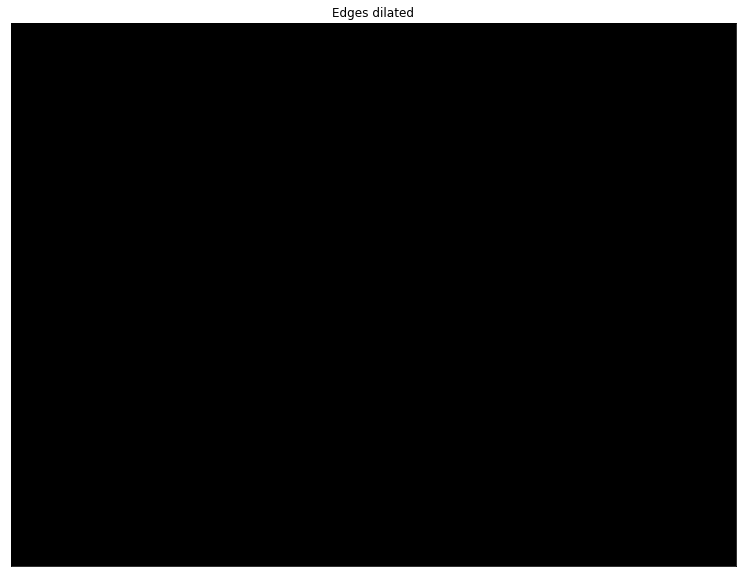

In [110]:
# prefiltrering and scaling 

img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)
img = imm2

iGausKernelSize = 7
imgFilt = cv2.GaussianBlur(img, (iGausKernelSize, iGausKernelSize), 0)

medianBlurKernelSize = 7
#imgFilt = cv2.medianBlur(img, medianBlurKernelSize)

#imgFilt = cv2.bilateralFilter(img, 20, 100, 60)


threshVal = 1
ret, imgThres = cv2.threshold(img, threshVal, 255, cv2.THRESH_TOZERO)
#ret, imgThres = cv2.threshold(imgFilt, threshVal, 255, cv2.THRESH_TRUNC)
#imgThres = cv2.adaptiveThreshold(imgFilt, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 3, 15)
#_, imgThres = cv2.threshold(imgFilt, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)
#ret, imgThres = cv2.threshold(imgFilt, threshVal, 255, cv2.THRESH_TRUNC)

iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = imgThres[iStart::iReducFactor, iStart::iReducFactor]
   
# compute the median of the single channel pixel intensities
med = np.median(imgReduc)
 
# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))


edges = cv2.Canny(imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)
edges_dilated = cv2.dilate(edges, np.ones((2,2), dtype=np.uint8))

edges = edges_dilated

# plot all the images
tools.multiPlot( 1, 2, (img, imgFilt,),
                       ('Normal', 'GaussianBlur', ),
                        cmap_tuple=(cm.gray, cm.gray, ))

tools.multiPlot(1, 2, ( imgThres, edges,), ('thresholding', 'Edges',), cmap_tuple=(cm.gray, cm.gray,))

tools.multiPlot(1, 1, (edges_dilated,), ('Edges dilated',), cmap_tuple=(cm.gray,))

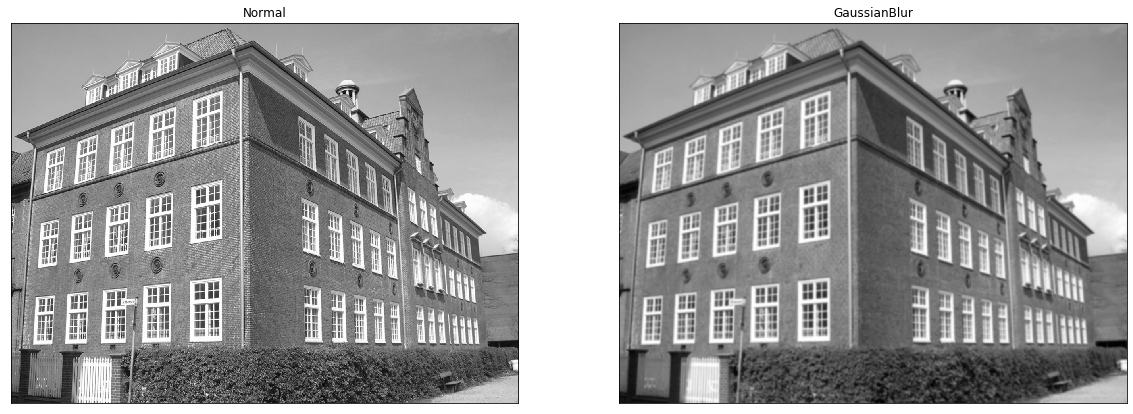

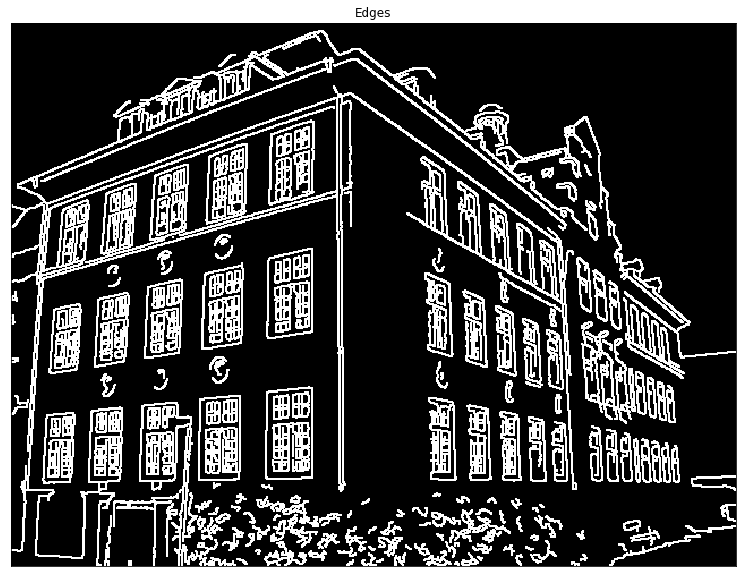

In [24]:
# prefiltrering and scaling - from TP

img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)

iGausKernelSize = 11
imgFilt = cv2.GaussianBlur(img, (iGausKernelSize, iGausKernelSize), 0)


iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = imgFilt[iStart::iReducFactor, iStart::iReducFactor]


# compute the median of the single channel pixel intensities
med = np.median(imgReduc)



# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))

edges = cv2.Canny( imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)
edges_dilated = cv2.dilate(edges, np.ones((2,2), dtype=np.uint8))
edges = edges_dilated



# plot all the images
tools.multiPlot( 1, 2, (img, imgFilt,),
                       ('Normal', 'GaussianBlur',),
                        cmap_tuple=(cm.gray, cm.gray,))

tools.multiPlot(1, 1, (edges,), ('Edges',), cmap_tuple=(cm.gray,))

In [101]:
#Hough 

def update(minLineLength=15, maxLineGap=4):
    img = cv2.imread(img_link, cv2.IMREAD_COLOR)
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
    for l in lines:
        for x1,y1,x2,y2 in l:
            cv2.line(img,(2*x1,2*y1),(2*x2,2*y2),(0,255,0),3)



    tools.multiPlot(1, 2, (img, edges),
                        ('Original image', 'Canny'),
                        cmap_tuple=(cm.gray, cm.gray))
interact(update, minLineLength = (0, 60, 5), maxLineGap = (0, 30, 1))

interactive(children=(IntSlider(value=15, description='minLineLength', max=60, step=5), IntSlider(value=4, des…

<function __main__.update(minLineLength=15, maxLineGap=4)>

(480, 640) (480, 640)


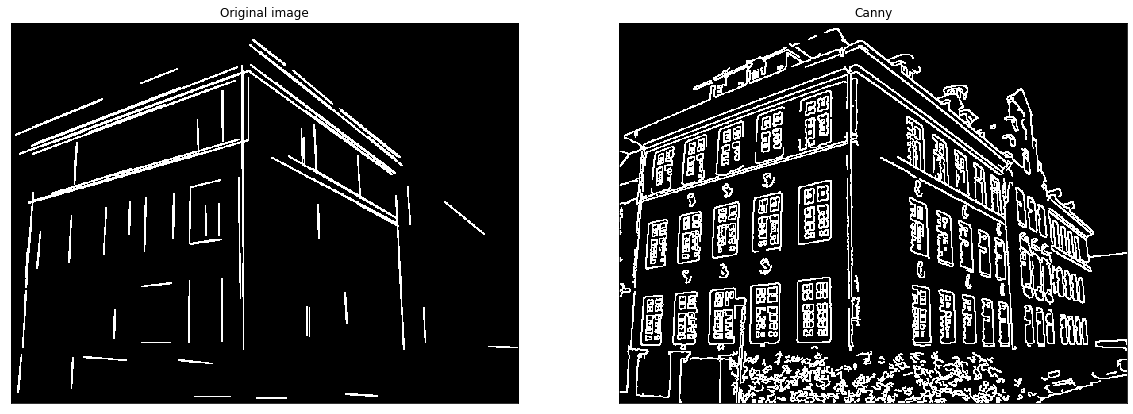

<class 'numpy.ndarray'>
255.0 255


In [70]:
height, width = img.shape[:2]
mat = np.zeros((height,width))

minLineLength = 35
maxLineGap = 2

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(mat,(2*x1,2*y1),(2*x2,2*y2),(255,255,255),3) 

iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = mat[iStart::iReducFactor, iStart::iReducFactor]

print(imgReduc.shape, edges.shape)

tools.multiPlot(1, 2, (imgReduc, edges),
                        ('Original image', 'Canny'),
                        cmap_tuple=(cm.gray, cm.gray))

cv2.imwrite('lines.png', imgReduc)
t = cv2.imread('lines.png', cv2.IMREAD_GRAYSCALE)

imgReduc.astype(int)

print(type(edges))

print(max(imgReduc[:, 30]), max(edges[:, 30]))

img_and = cv2.bitwise_and(t, edges)